# 증식을 통한 데이터셋 크기 확장

## 1. Google Drive와 연동

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = "gdrive/'My Drive'/'Colab Notebooks'/CNN"

!ls gdrive/'My Drive'/'Colab Notebooks'/CNN/datasets

cats_and_dogs_small


## 2. 모델 생성

In [ ]:
from tensorflow.keras import layers, models, optimizers

0. Sequential 객체 생성
1. conv layer(filter32, kernel size(3,3), activation 'relu', input_shape()
2. pooling layer(pool_size(2,2))
3. conv layer(filter 64, kernel size(3,3), activation 'relu'
4. pooling layer(pool_size(2,2))
5. conv layer(filter 128, kernel size(3,3), activation 'relu'
6. pooling layer(pool_size(2,2))
7. conv layer(filter 128, kernel size(3,3), activation 'relu'
8. pooling layer(pool_size(2,2))
-------
9. flatten layer
10. Dense layer 512, relu
11. Dense layer 1, sigmoid

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 3. 데이터 전처리

In [ ]:
import os
base_dir = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [ ]:
# [코드작성]
# train_datagen이라는 ImageDataGenerator 객체 생성 
# train_datagen의 증식 옵션 
# 1. scale  :  0~1
# 2. 회전 각도 범위 : -40~+40
# 3. 수평이동 범위 : 전체 너비의 20% 비율
# 4. 수직이동 범위 : 전체 높이의 20% 비율
# 5. 전단 변환(shearing) 각도 범위 : 10%
# 6. 사진 확대 범위 : 20%
# 7. 이미지를 수평으로 뒤집기 : True
# 8. 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략 : 'nearest'

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.1, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=20,class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150,150), batch_size=20,class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 4. 모델 훈련

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 526s 5s/step - loss: 0.6970 - accuracy: 0.5140 - val_loss: 0.6874 - val_accuracy: 0.5410
Epoch 2/30
100/100 [==============================] - 23s 229ms/step - loss: 0.6865 - accuracy: 0.5545 - val_loss: 0.6869 - val_accuracy: 0.5320
Epoch 3/30
100/100 [==============================] - 22s 225ms/step - loss: 0.6742 - accuracy: 0.5895 - val_loss: 0.6685 - val_accuracy: 0.5890
Epoch 4/30
100/100 [==============================] - 23s 226ms/step - loss: 0.6668 - accuracy: 0.6040 - val_loss: 0.6377 - val_accuracy: 0.6310
Epoch 5/30
100/100 [==============================] - 23s 227ms/step - loss: 0.6580 - accuracy: 0.6155 - val_loss: 0.6327 - val_accuracy: 0.6370
Epoch 6/30
100/100 [==============================] - 23s 229ms/step - loss: 0.6377 - accuracy: 0.6310 - val_loss: 0.6227 - val_accuracy: 0.6420
Epoch 7/30
100/100 [==============================] - 23

## 5. 성능 시각화

In [ ]:
import matplotlib.pyplot as plt

acc    = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

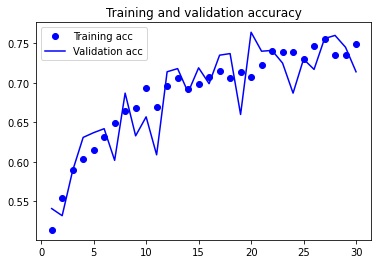

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

* acc와 val_acc 모두 증가하는 경향을 보아 과적합이 발생하지 않았음

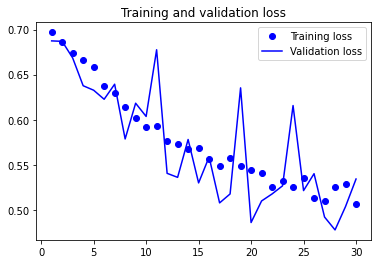

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6. 모델 평가하기

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [ ]:
print(test_loss)
print(test_accuracy)

0.5713947415351868
0.7160000205039978


## 7. 모델 저장

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small_augmentation.h5')